# Import Libraries

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import numpy as np

import os

# Load Data

In [1]:
dataset_dir = 'dataset/asl_alphabet_train'

In [45]:
import os

train_A_dir = os.path.join('dataset/asl_alphabet_train/A')
train_B_dir = os.path.join('dataset/asl_alphabet_train/B')
train_C_dir = os.path.join('dataset/asl_alphabet_train/C')
train_D_dir = os.path.join('dataset/asl_alphabet_train/D')
train_E_dir = os.path.join('dataset/asl_alphabet_train/E')

In [46]:
train_A_names = os.listdir(train_A_dir)
train_B_names = os.listdir(train_B_dir)
train_C_names = os.listdir(train_C_dir)
train_D_names = os.listdir(train_D_dir)
train_E_names = os.listdir(train_E_dir)

In [47]:
print('total training A images:', len(os.listdir(train_A_dir)))
print('total training B images:', len(os.listdir(train_B_dir)))
print('total training C images:', len(os.listdir(train_C_dir)))
print('total training D images:', len(os.listdir(train_D_dir)))
print('total training E images:', len(os.listdir(train_E_dir)))

total training A images: 3000
total training B images: 3000
total training C images: 3000
total training D images: 3000
total training E images: 3000


In [48]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph
nrows = 5
ncols = 5

# Index for iterating over images
pic_index = 0

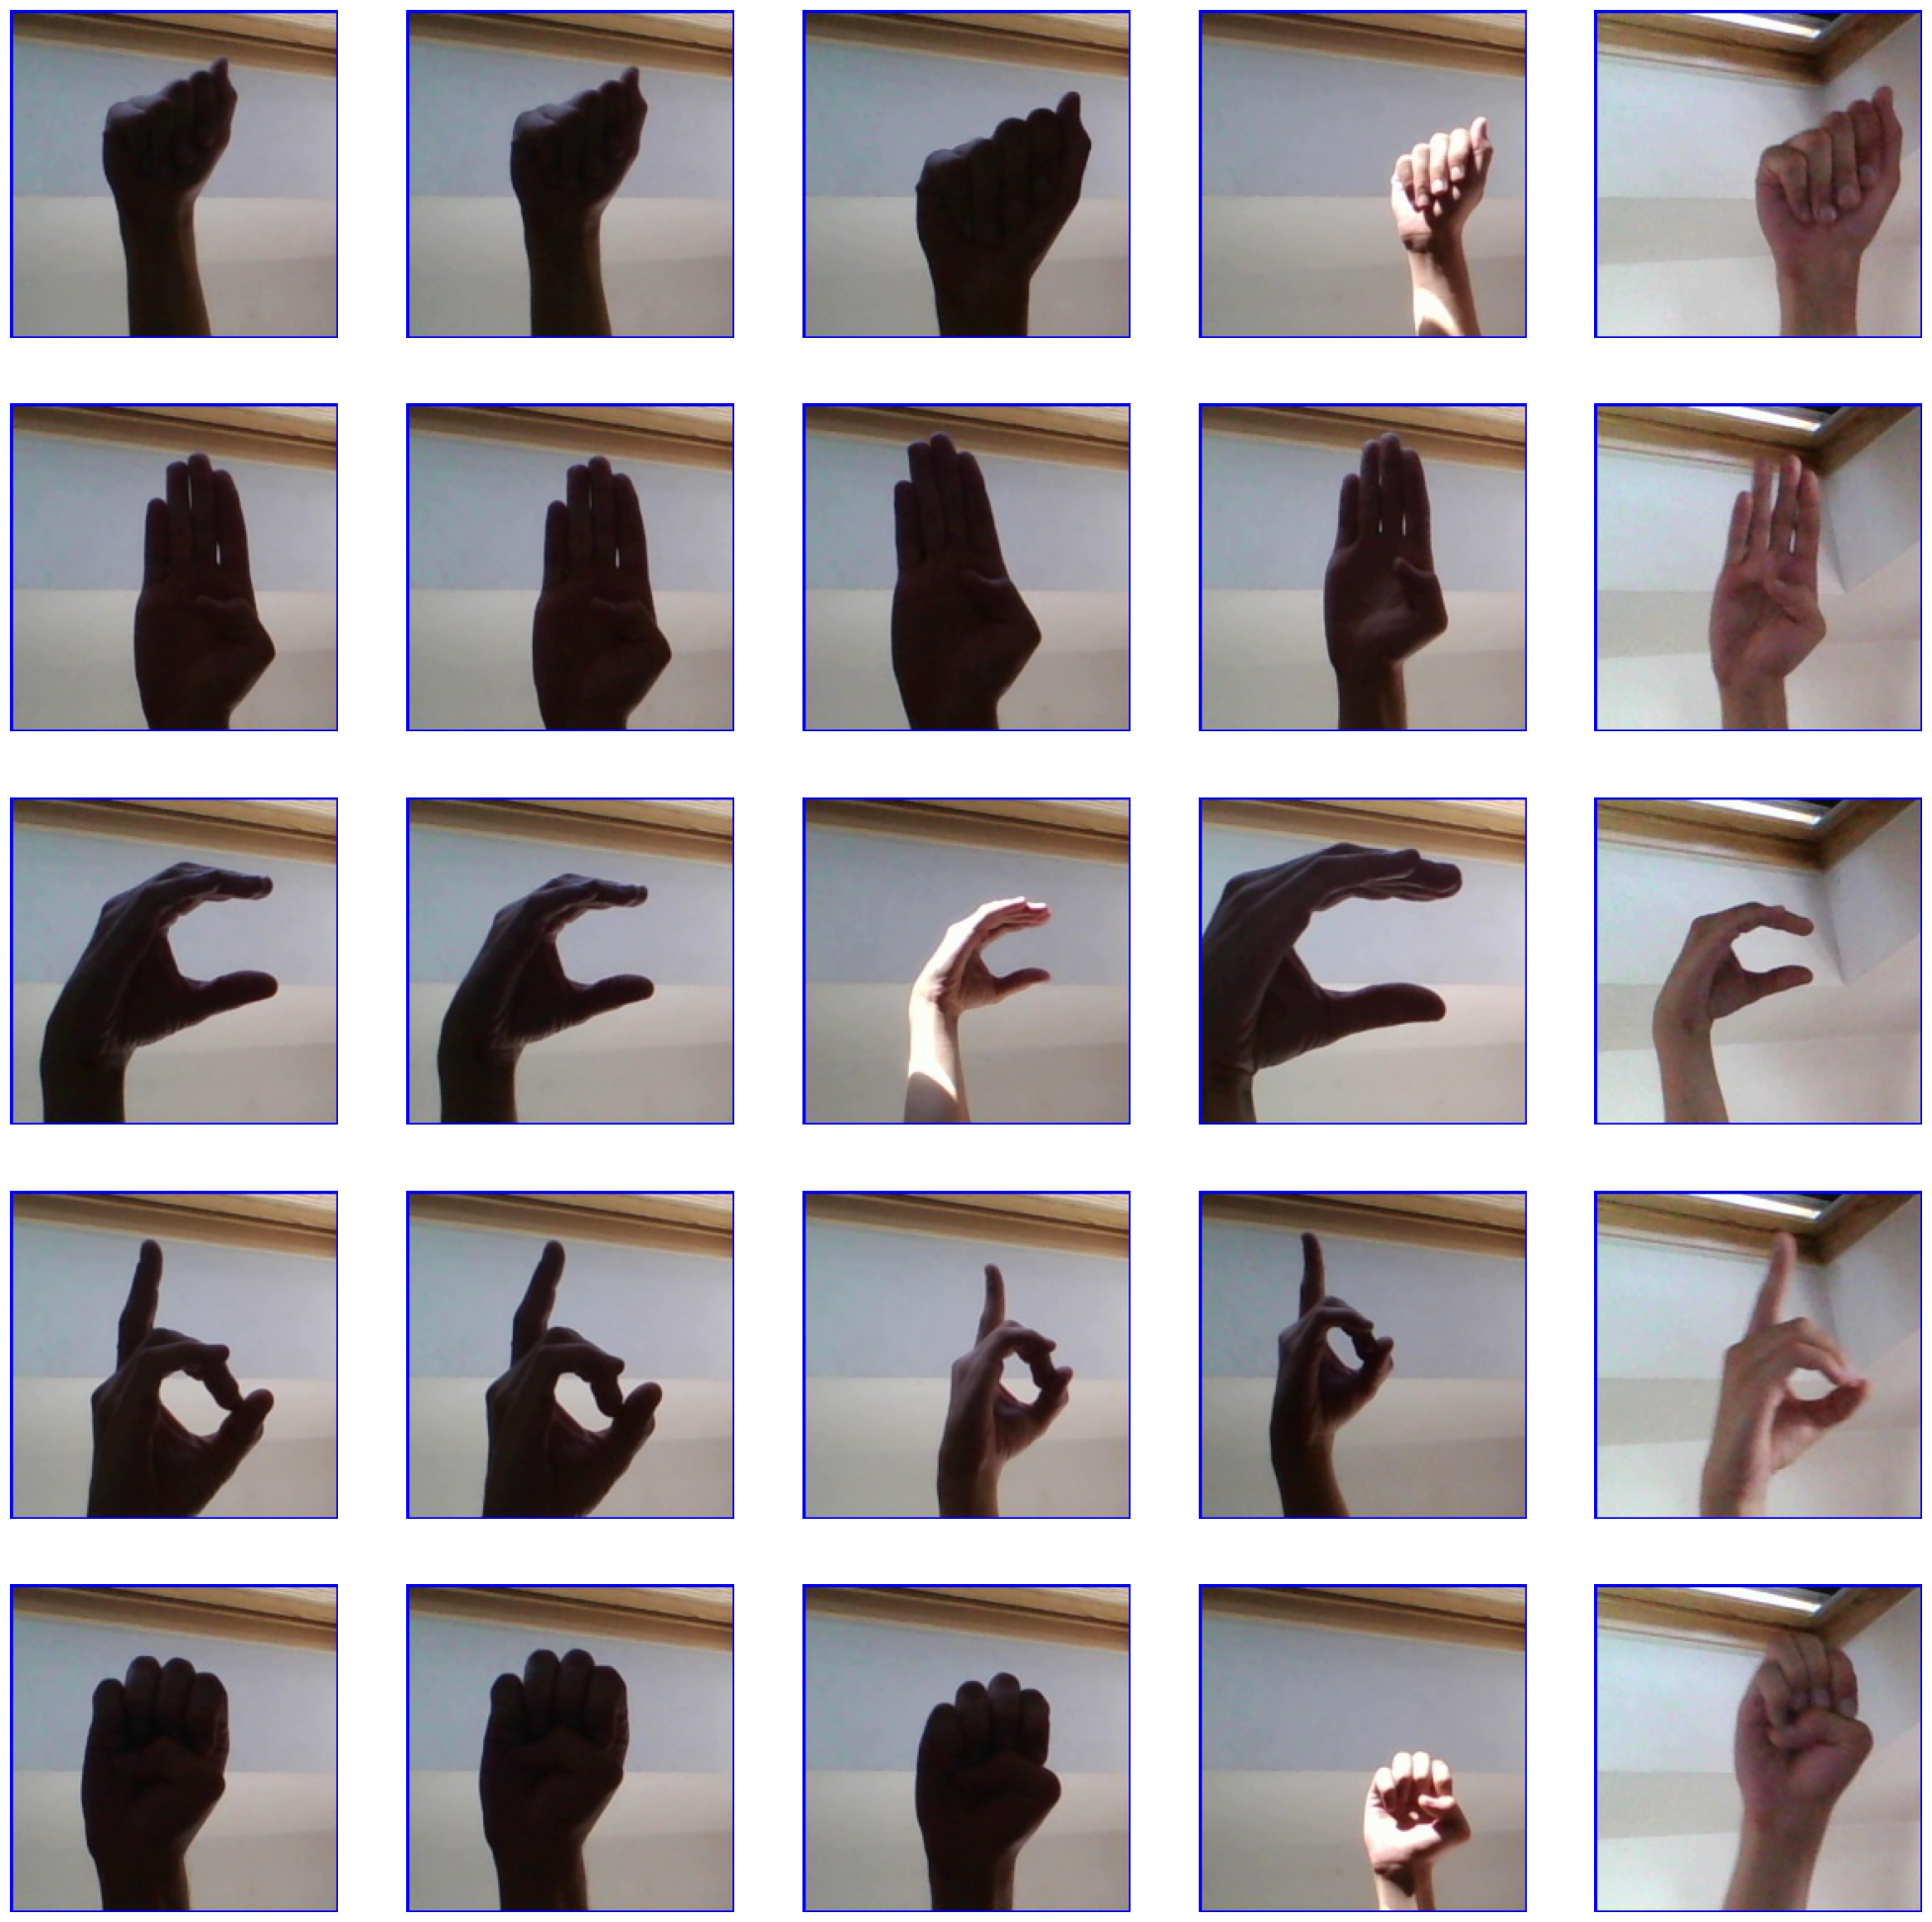

In [49]:
# Set up matplotlib fig
fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 5)

pic_index += 5
next_A_pix = [os.path.join(train_A_dir, fname)
                for fname in train_A_names[pic_index-5:pic_index]]
next_B_pix = [os.path.join(train_B_dir, fname)
                for fname in train_B_names[pic_index-5:pic_index]]
next_C_pix = [os.path.join(train_C_dir, fname)
                for fname in train_C_names[pic_index-5:pic_index]]
next_D_pix = [os.path.join(train_D_dir, fname)
                for fname in train_D_names[pic_index-5:pic_index]]
next_E_pix = [os.path.join(train_E_dir, fname)
                for fname in train_E_names[pic_index-5:pic_index]]

for i, img_path in enumerate(next_A_pix+next_B_pix+next_C_pix+next_D_pix+next_E_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Data Augmentation

In [11]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.01
)

In [13]:
train_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150,150),
    class_mode='categorical',
    batch_size = 105,
    
    subset='training',
)

val_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150,150),
    class_mode='categorical',
    batch_size = 105,
    subset='validation'
)

Found 86130 images belonging to 29 classes.
Found 870 images belonging to 29 classes.


# Modelling

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(150,150,3), activation='relu'),  
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
     
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(29, activation='softmax')
])

In [20]:
model.compile(metrics=['acc'], optimizer='adam', loss='categorical_crossentropy')

In [21]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 74, 74, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 175232)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 175232)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │      89,719,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 29)                  │          14,877 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89,809,821 (342.60 MB)

 Trainable params: 89,809,821 (342.60 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(train_gen, epochs=5, validation_data=val_gen, shuffle=True)

Epoch 1/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 3463s 4s/step - acc: 0.8201 - loss: 0.5509 - val_acc: 0.8299 - val_loss: 0.4414
Epoch 2/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 3999s 5s/step - acc: 0.9391 - loss: 0.1790 - val_acc: 0.9149 - val_loss: 0.2150
Epoch 3/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 3513s 4s/step - acc: 0.9642 - loss: 0.1032 - val_acc: 0.8828 - val_loss: 0.2764
Epoch 4/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 3544s 4s/step - acc: 0.9719 - loss: 0.0806 - val_acc: 0.9184 - val_loss: 0.1842
Epoch 5/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 4126s 5s/step - acc: 0.9789 - loss: 0.0614 - val_acc: 0.9092 - val_loss: 0.2282


# Model Evaluation
> Model isn't overfit or underfit

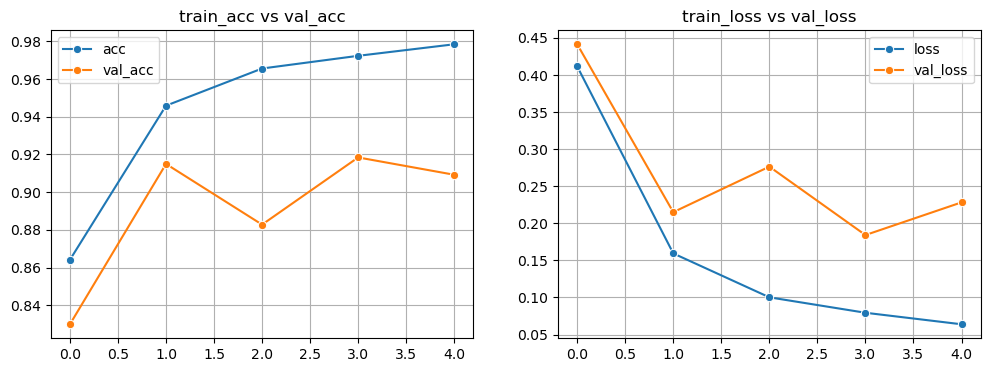

In [27]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.lineplot(data=history.history['acc'], ax=axes[0], label='acc', marker='o')
sns.lineplot(data=history.history['val_acc'], ax=axes[0], label='val_acc', marker='o')

sns.lineplot(data=history.history['loss'], ax=axes[1], label='loss', marker='o')
sns.lineplot(data=history.history['val_loss'], ax=axes[1], label='val_loss', marker='o')

axes[0].set_title('train_acc vs val_acc')
axes[1].set_title('train_loss vs val_loss')

axes[0].grid(True)
axes[1].grid(True)

plt.legend()
plt.show()

# Implementation

In [ ]:
img_filename = 'dataset/asl_alphabet_test/A_test.jpg'

img = tf.keras.utils.load_img(img_filename, target_size=(150,150))

In [38]:
img_array = tf.keras.utils.img_to_array(img)

In [41]:
batch_image_array = np.array([img_array])

In [43]:
result = my_model.predict(batch_image_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


In [44]:
result

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)